# Customer Purchase Intent

In [1]:
import pandas as pd
import os

In [2]:
artifact_path = os.path.join(os.getcwd(), '..', "artifacts")
events = pd.read_csv(os.path.join(artifact_path,"data","events.csv"))

In [3]:
events

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy
3,2020-09-24 11:57:33 UTC,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08
4,2020-09-24 11:57:36 UTC,view,3658723,2144415921169498184,NaN,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ
...,...,...,...,...,...,...,...,...,...
885124,2021-02-28 23:55:01 UTC,view,953226,2144415927553229037,NaN,NaN,219.94,1515915625611023730,FRLqIttxKU
885125,2021-02-28 23:58:05 UTC,view,1715907,2144415927049912542,electronics.video.tv,starwind,80.03,1515915625611024014,g6WqPf50Ma
885126,2021-02-28 23:58:09 UTC,view,4170534,2144415939364389423,electronics.clocks,amazfit,64.92,1515915625611024020,xNIJBqZdkd
885127,2021-02-28 23:58:14 UTC,view,888273,2144415921932861531,electronics.telephone,NaN,10.16,1515915625611024030,9pCbKMIcSx


In [4]:
def split_data(df):
    df_ = df.copy()
    
    #Radom split
    user_sessions = df_.sample(frac=1)['user_session'].unique()
    train_size = len(user_sessions)*60 // 100
    train_df = df_[df_['user_session'].isin(user_sessions[:train_size])]
    test_df = df_[df_['user_session'].isin(user_sessions[train_size:])]
    
    return train_df, test_df

train_df, test_df = split_data(events)

In [6]:
def feature_extraction(df):
    df_ = df.copy()
    
    #Clean missing values
    df_ = df_.dropna()
    
    #Extract features
    df_agg = df_.groupby('user_session').agg({'price' : ['sum', 'min'], 'brand' : ['count'], 
                                               'category_code' : ['count'],'product_id' : ['count'],
                                               'event_time' : ['count']}, axis="columns")
    df_agg['unique_event_type'] = df_.groupby('user_session')['event_type'].nunique()
    
    #Labeling
    df_agg['label'] =  df_.groupby('user_session')['event_type'].apply(lambda x: x.eq('cart').any() | x.eq('purchase').any()).astype(int)
    
    X_features = df_agg.drop(['label'], axis = 1)
    y_agg = df_agg['label']
    
    return X_features, y_agg

train_features, train_y = feature_extraction(train_df)
test_features, test_y = feature_extraction(test_df)

In [7]:
from sklearn.linear_model import LogisticRegression
def fit_model(X, y):
    lr = LogisticRegression()
    lr.fit(X,y)
    return lr

model = fit_model(train_features, train_y)

/Users/liorsidi/.conda/envs/customer_purchase_intent/lib/python3.7/site-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [8]:
from sklearn.metrics import accuracy_score
def evaluate(y, preds):
    accuracy = accuracy_score(y, preds)
    return accuracy

test_preds = model.predict(test_features)
accuracy = evaluate(test_y,test_preds)

/Users/liorsidi/.conda/envs/customer_purchase_intent/lib/python3.7/site-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [9]:
accuracy

0.9949830547199269

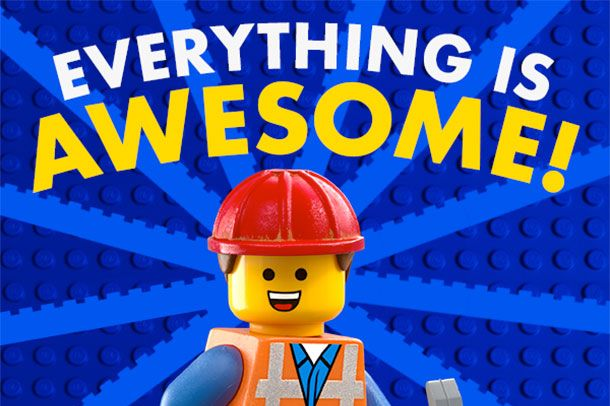

In [10]:
from IPython import display
display.Image("https://pyxis.nymag.com/v1/imgs/879/d0a/f23ba0be00e71b5d88731977b3ca4905d2-13-everything-is-awesom.rhorizontal.w700.jpg")

In [11]:
train_X, train_y, test_X, test_y = split_data(df)

train_features = feature_extraction(train_X)

model = fit_model(train_features, train_y)

test_features = feature_extraction(test_X)

test_preds = model.predict(test_features)

accuracy = evaluate(test_preds, test_y)

NameError: name 'df' is not defined